<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Загрузка-данных" data-toc-modified-id="Шаг-1.-Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Загрузка данных</a></span></li><li><span><a href="#Шаг-2.-Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Шаг-2.-Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Шаг-3.-Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Шаг-3.-Модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Шаг-4.-Кластеризация-клиентов" data-toc-modified-id="Шаг-4.-Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Кластеризация клиентов</a></span></li><li><span><a href="#Шаг-5.-Выводы-и-базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Шаг-5.-Выводы-и-базовые-рекомендации-по-работе-с-клиентами-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 5. Выводы и базовые рекомендации по работе с клиентами</a></span></li></ul></div>

# Стратегия взаимодействия с клиентами фитнес-центра

**Цель проекта** - разработка стратегии взаимодействия с клиентами на основе аналитических данных для сети фитнес-центров  и решения задачи борьбы с оттоком клиентов.


Данные для анализа: электронные клиентские анкеты.


План проекта:
1. [Загрузка данных](#1)
2. [Исследовательский анализ данных (EDA)](#2)
3. [Модель прогнозирования оттока клиентов](#3)
4. [Кластеризация клиентов](#4)
5. [Выводы и рекомендации](#5)

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
import itertools

<a id='1'></a>

## Шаг 1. Загрузка данных

In [2]:
gym = pd.read_csv('...')

In [3]:
gym.sample(20)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
152,1,1,1,1,1,12,1,32,207.524673,9.0,1,0.073932,0.054158,0
197,1,1,0,0,1,1,0,27,184.172449,1.0,2,1.381842,1.588576,1
1249,1,1,1,1,1,12,0,32,334.039975,12.0,8,0.143986,0.214325,0
749,1,1,0,0,1,1,0,24,186.638844,1.0,1,1.407051,0.151399,1
746,1,1,1,0,0,12,0,30,261.591305,12.0,1,0.989806,0.835060,0
1608,1,1,0,0,1,1,1,26,240.060535,1.0,1,0.851689,0.592379,1
3035,1,1,1,0,1,1,0,28,244.311935,1.0,3,1.285324,1.374669,0
3289,0,1,0,0,1,1,0,24,60.596993,1.0,0,2.987903,3.322065,1
2199,0,1,1,1,1,1,0,28,86.649918,1.0,1,2.027721,1.396990,1
628,0,1,1,1,1,1,1,22,227.357835,1.0,1,2.421386,2.244291,1


Таблица содержит данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

- Данные клиента за предыдущий до проверки факта оттока месяц:
    - 'gender' — пол;
    - 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
    - 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    - 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    - 'Phone' — наличие контактного телефона;
    - 'Age' — возраст;
    - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    - 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    - 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    - 'Group_visits' — факт посещения групповых занятий;
    - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
    - 'Churn' — факт оттока в текущем месяце.

<a id='2'></a>

## Шаг 2. Исследовательский анализ данных (EDA)

- Обзор и описание данных (отсутсвующие признаки, средние значения, стандартные отклонения)
- Средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался
- Столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
- Матрица корреляций

In [4]:
# просмотр основной информации о таблице
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В датасете 4000 записей. Пропущенных значений нет, типы значений соответствуют содержанию.

In [5]:
# описание данных
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Наибольшее стандартное отклонение наблюдается для признака Avg_additional_charges_total: среди клиентов есть те, кто тратит очень маленькую сумму на дополнительные услуги, и те, кто пользуется большим набором дополнительных услуг.
Большинство оставшихся признаков либо относятся к бинарным, либо ограничены объективными обстоятельствами: сроки абонементов, количество дней в неделе, максимальный лайфтайм.

In [6]:
# cредние значения признаков для ушедших и оставшихся клиентов
gym_ch = gym.groupby('Churn').agg('mean').reset_index()
gym_ch

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Для **оставшихся клиентов** в среднем характерно:
 - более близкое проживание к клубу;
 - участие в партнерской программе;
 - более частое участие в акции "Приведи друга";
 - период контракта 6 месяцев и самое начало абонемента;
 - более частое посещение групповых занятий;
 - средний возраст 29-30 лет;
 - более высокие траты;
 - 5 месяцев со дня первого обращения;
 - стабильное посещение клуба (за предыдущий месяц среднее количество раз в неделю совпадает с общим средним количеством посещений в неделю).
 
 Для **ушедших клиентов** в среднем характерно:
 - небольшой срок действия абонемента - 2 месяца;
 - не посещение групповых занятий;
 - средний возраст 27 лет;
 - 1 месяц посещений;
 - падение количества посещений в неделю (в среднем за неделю посещений больше, чем в предыдщуем месяце).

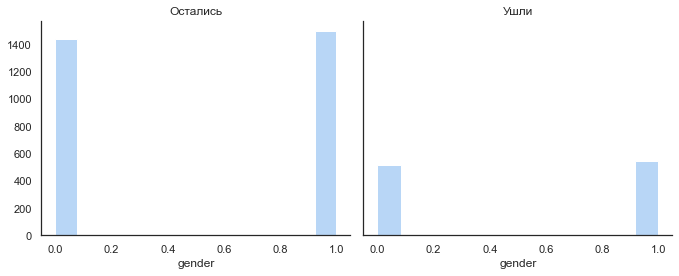

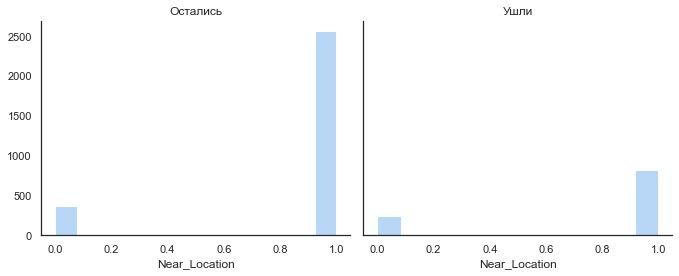

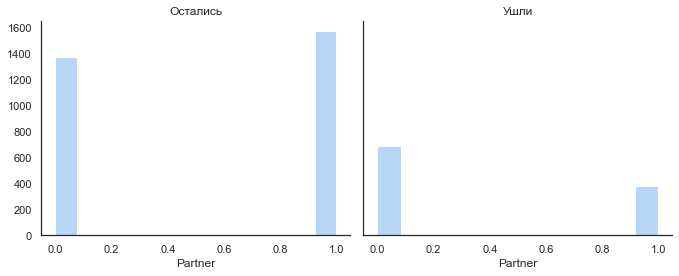

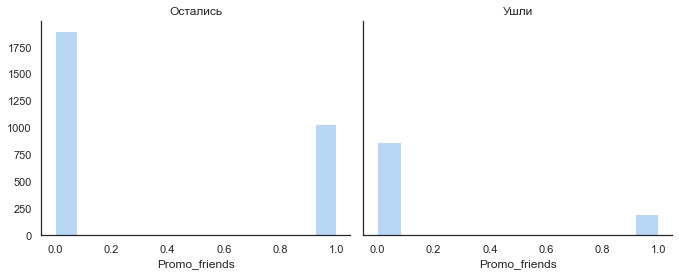

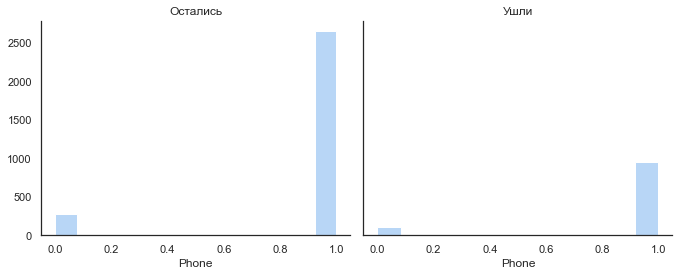

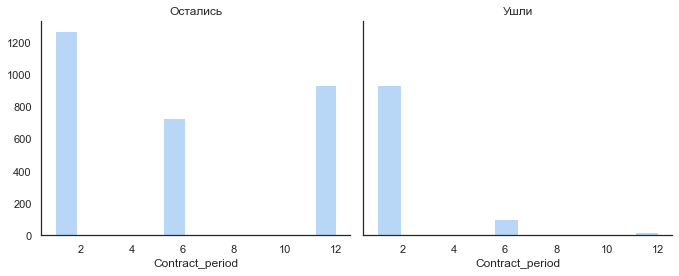

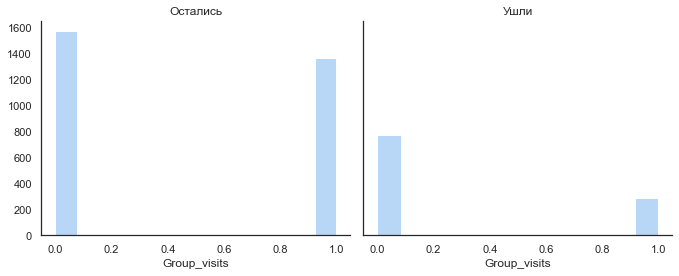

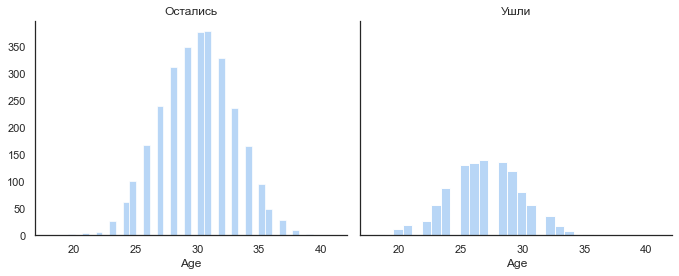

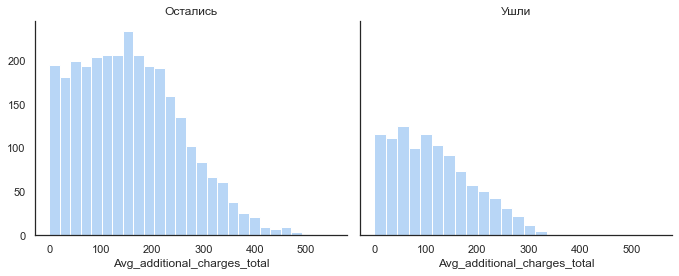

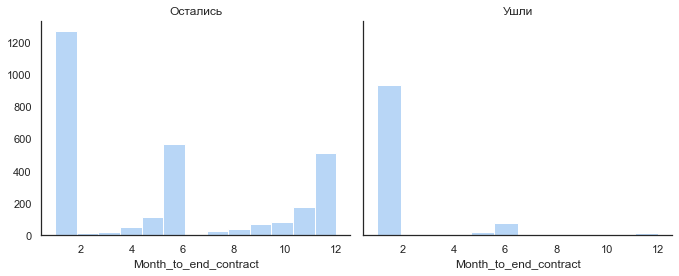

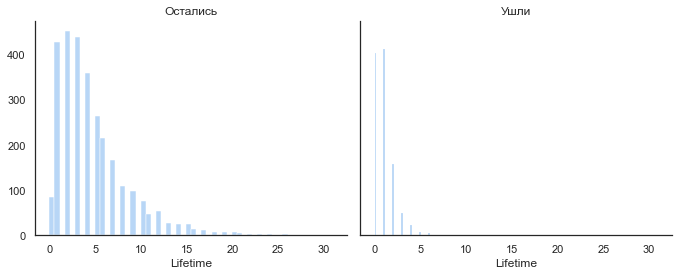

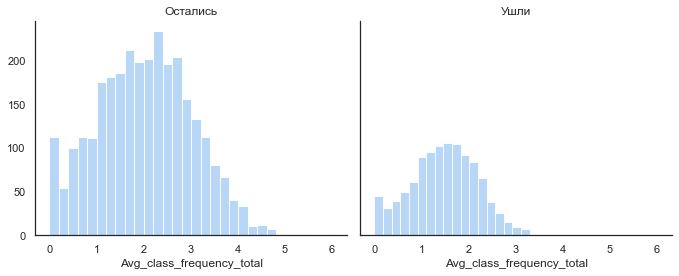

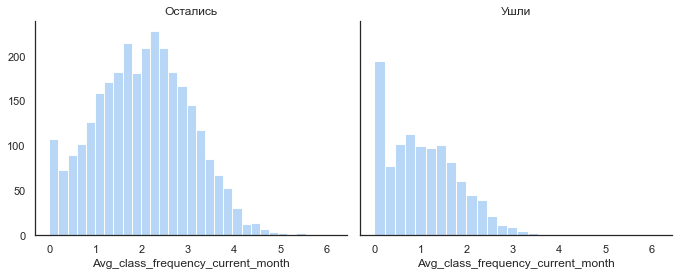

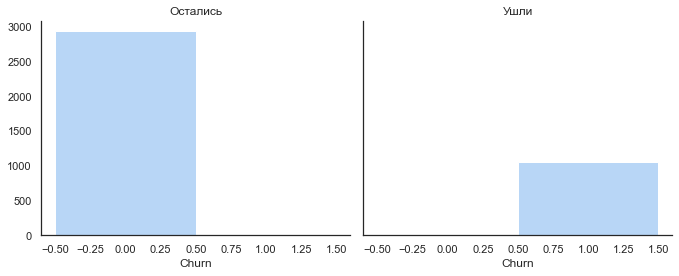

In [7]:
# гистограммы распределения признаков для оставшихся и ушедших клиентов
for col in gym:
    sns.set_theme(style="white", palette='pastel')
    d = sns.FacetGrid(gym, col="Churn", height=4, aspect=1.2)
    d.map(sns.histplot, col)
    axes = d.axes.flatten()
    axes[0].set_title("Остались")
    axes[1].set_title("Ушли")
    plt.show()

- Соотношение полов у двух категорий клиентов примерно одинаково;
- Оставшиеся клиенты чаще живут ближе, чем ушедшие;
- Среди оставшихся больше участников партнерской программы, среди ушедших - больше тех, кто не участвует в партнерской программе;
- Среди оставшихся большинство участвовали в акции "Приведи друга", среди ушедших большинство в этой акции не участвовали;
- Как среди оставшихся, так и среди ушедших наиболее распространены контракты на 1 месяц, однако среди ушедших минимальное количество контрактов на 12 месяц, когда у оставшихся такие контракты на втором месте;
- Среди ушедших практически нет клиентов старше 35 лет;
- Оставшиеся клиенты тратят больше денег на допуслуги;
- Среди оставшихся и среди ушедших большинство контрактов закончатся через месяц, но среди ушедших так же выделяется доля тех, кто оставил занятия в начале полугодового контракта;
- Лайфтайм ушедших не превышает 6 месяцев, доля оставшихся после 6 месяцев также постепенно уменьшается;
- Как среди ушедших, так и среди оставшихся большое количество тех, кто не посещал занятия, однако, для ушедших сокращение количества посещений наблюдается уже от двух дней в неделю, оставшиеся же стабильно посещают клуб и 3 раза в неделю.
- Большинство ушедших в последнем месяце уже не посещали занятия, оставшися посещают занятия в последний месяц также стабильно как и в среднем.

**Таким образом, вероятнее всего уйдет в отток клиент, который:**
- не связан ни с партнерской компанией, ни с друзьями, посещающими клуб - т.е. скорее всего ходит в клуб один, без знакомых;
- живет достаточно далеко от клуба;
- купил абонемент на 1 месяц - пробует и клуб, и себя в фитнесе;
- в возрасте до 30 лет;
- мало тратит на допуслуги;
- не ходит на групповые занятия;
- чаще ходит в клуб 1 раз в неделю и в последний месяц обычно не приходит.

In [8]:
# матрица корреляции
gym.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


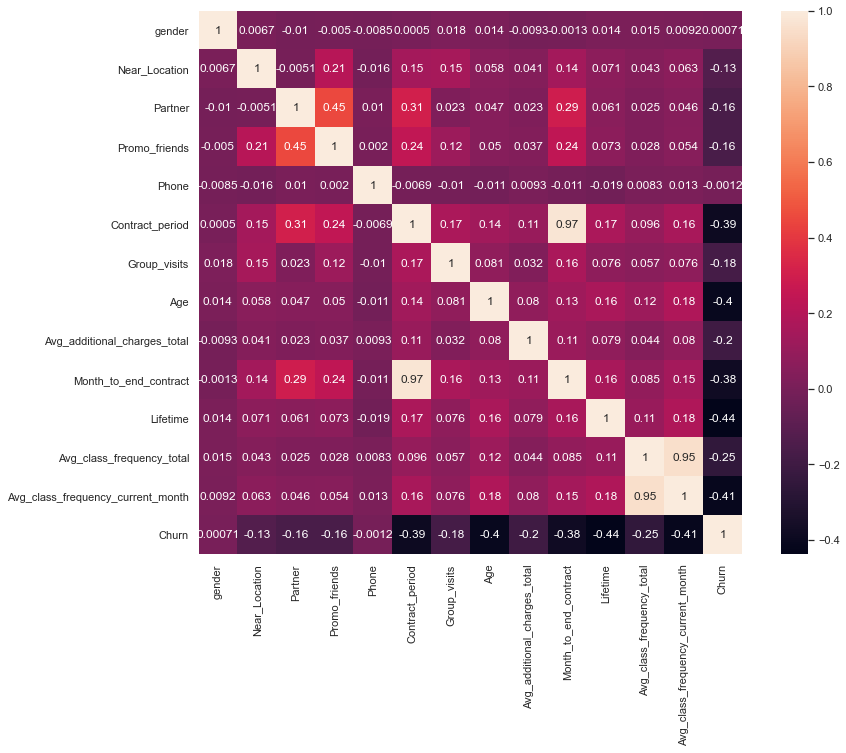

In [9]:
# тепловая карта корреляции
plt.figure(figsize=(14, 10))
sns.heatmap(gym.corr(), annot=True, square=True)
plt.show();

Наиболее сильная корреляция между признаками:
- Month_to_end_contract и Contract_period
- Avg_class_frequency_total и Avg_class_frequency_current_month	
Т.е. для большинства клиентов сопадает срок конктракта и количество месяцев до его окончания - большинство клиентов либо новые, либо продлившие конктракт, также большинство клиентов посещают клуб стабильное количество раз в неделю за весь период и в последнем месяце.

Для применения алгоритма модели машинного обучения один показатель из каждой пары призанаков будет удален.

Других сильных и средних по силе корреляций не обнаружено.

<a id='3'></a>

## Шаг 3. Модель прогнозирования оттока клиентов

- Построение модели бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце (логистической регрессией и случайным лесом)
- Оценка метрик accuracy, precision и recall для обеих моделей на валидационной выборке 
- Сравнение моделей по метрикам

In [10]:
# удаление мультиколлениарных признаков
gym_a = gym.drop(['Month_to_end_contract', 'Avg_class_frequency_total'], axis = 1)
gym_a.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.120078,0


In [11]:
# разделение данных на признаки
X = gym_a.drop('Churn', axis = 1)
y = gym_a['Churn']

In [12]:
# разделение модели на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [13]:
# функция для расчета метрик
def print_all_metrics(y_true, y_pred, y_proba):
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [14]:
#алгоритм модели логистической регрессии
model_reg = LogisticRegression(solver='liblinear', random_state=0)

# обучение модели
model_reg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [15]:
# прогнозы
predictions_reg = model_reg.predict(X_test)
probabilities_reg = model_reg.predict_proba(X_test)[:,1]

In [16]:
# вывод метрик
print('Метрики логистической регрессии')
print_all_metrics(y_test, predictions_reg, probabilities_reg)

Метрики линейной регрессии
	Accuracy: 0.91
	Precision: 0.85
	Recall: 0.82


In [17]:
#алгоритм модели случайного леса
model_rf = RandomForestClassifier(n_estimators = 100, random_state=0)
# обучение модели
model_rf.fit(X_train, y_train)
# прогнозы
predictions_rf = model_rf.predict(X_test) 
probabilities_rf = model_rf.predict_proba(X_test)[:,1]

In [18]:
# вывод метрик
print('Метрики случайного леса')
print_all_metrics(y_test, predictions_rf, probabilities_rf)

Метрики случайного леса
	Accuracy: 0.90
	Precision: 0.85
	Recall: 0.77


**Сравненние моделей логистической регрессии и случайного леса на основе метрик**
- Accuracy - доля правильных ответов на 1% выше у модели логистической регрессии
- Precision - точность для целевого класса моделей одинаковая
- Recall - обнаружение реальных объектов целевого класса выше у модели логистической регрессии (82%)

Таким образом, модель логистической регрессии точнее модели случайного леса.

<a id='4'></a>

## Шаг 4. Кластеризация клиентов

- Стандартизация данных
- Матрицу расстояний и дендрограмма
- Обучение модели кластеризации
- Изучение средних значений признаков для кластеров, гистограммы
- Доля оттока для каждого кластера, поиск надежных кластеров

In [19]:
# стандартизация данных
sc = StandardScaler()
x_sc = sc.fit_transform(X)

In [20]:
# матрица расстояний
linked = linkage(x_sc, method = 'ward') 

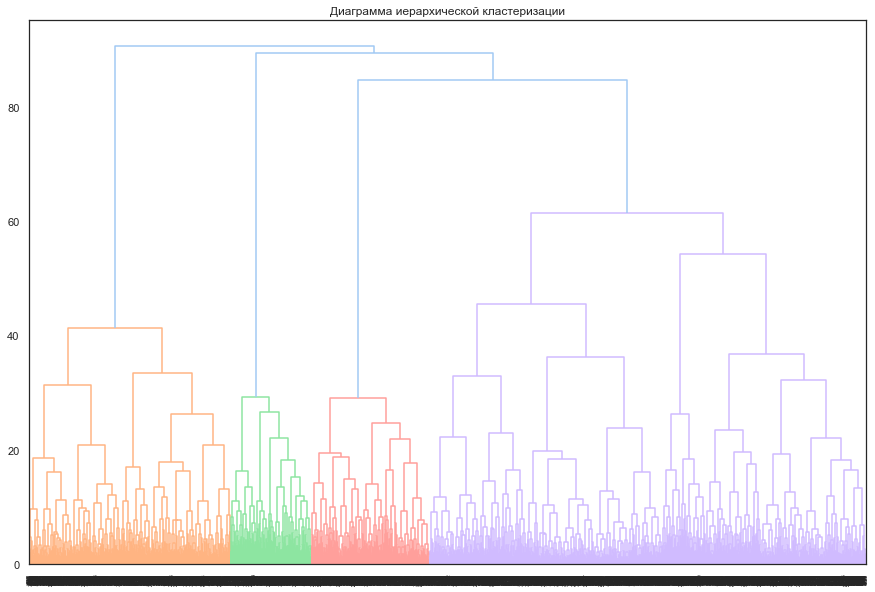

In [21]:
# дендрограмма
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Диаграмма иерархической кластеризации')
plt.show();

На дендрограмме возможно выделить 4 или 5 кластеров. В случае с выделением 5-ти кластеров следует обратить внимание, что два последних из них наиболее похожи друг на друга.

In [22]:
# построение алгоритма
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
# применение алгоритма к данным и формирование вектора кластеров 
labels = km.fit_predict(x_sc)

In [23]:
# добавление вычисленных кластеров в таблицу
gym['cluster_km'] = labels

In [24]:
# средние значения признаков по кластерам
gym.groupby('cluster_km').agg('mean').reset_index()

,cluster_km,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.496447,0.995939,0.892386,1.000000,1.0,6.922843,0.524873,29.606091,153.424651,6.332995,4.283249,1.962217,1.919520,0.119797
1,1,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.818996,2.974910,1.764122,1.597146,0.403226
2,2,0.500940,1.000000,0.217105,0.072368,1.0,2.010338,0.277256,27.583647,119.339956,1.941729,1.922932,1.451098,1.203319,0.563910
3,3,0.534260,0.996028,0.379345,0.009930,1.0,6.208540,0.538232,30.699106,176.259567,5.650447,5.415094,2.322960,2.324220,0.014896
4,4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


**Сравнение кластеров по средним значениям**
- Чаще ближе к клубу живут клиенты кластеров 0, 2, 3, клиенты кластера 1 не живут рядом с клубом
- Больше всего участников партнерских программ больше в кластере 0, так же всех из них пригласили в клуб друзья
- Меньшее количество участиков партнерских программ в кластере 2, в кластери 3 практически никто не использовал акцию с друзьями
- Все клиенты, кроме кластера 4 оставили свой номер телефоны
- Средний срок контракта для кластера 0 и 3 - более 6 месяцев; для кластера 1 и 2 - более 2 месяцев, для кластера 4 - более 4 месяцев
- Групповые занятия чаще посещают клиенты кластеров 0 и 3, реже всего - кластера 1
- У клиентов кластеров 0,3 и 4 средний возраст более 29 лет
- Больше всего денег на допуслуги тратят клиенты кластеров 0 и 3, меньше всего - кластера 2
- Самый большой срок оставшийся от контракта у кластеров 0 и 3, у кластера два осталось 2 месяца до конца контракта
- Самые долгие клиенты - из кластера 3 - более 5 месяцев, меньше всего по сроку ходят в клуб клиенты кластера 2
- Чаще всех в среднем и за псоледний месяц ходят в клуб клиенты кластера 3, реже всех - клиенты кластера 2
- Отток ниже всего в кластерах 0 и 3, самый высокий отток в кластере 2.

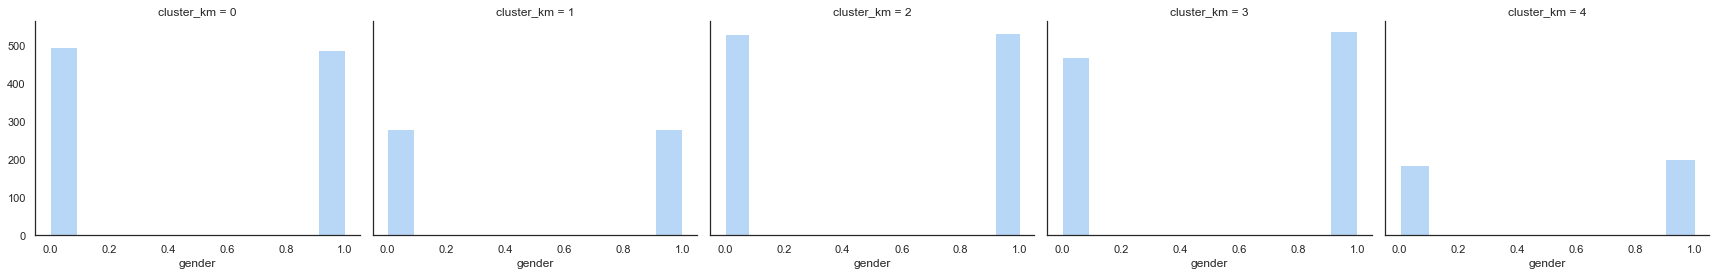

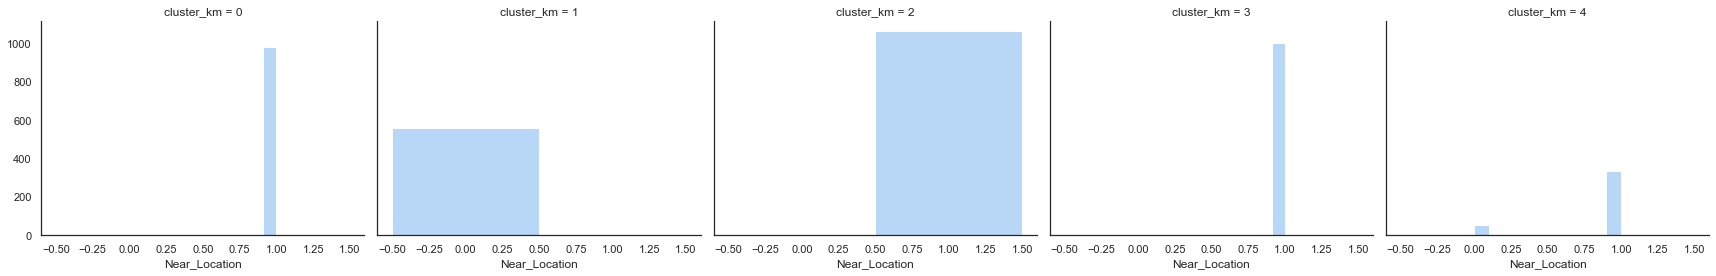

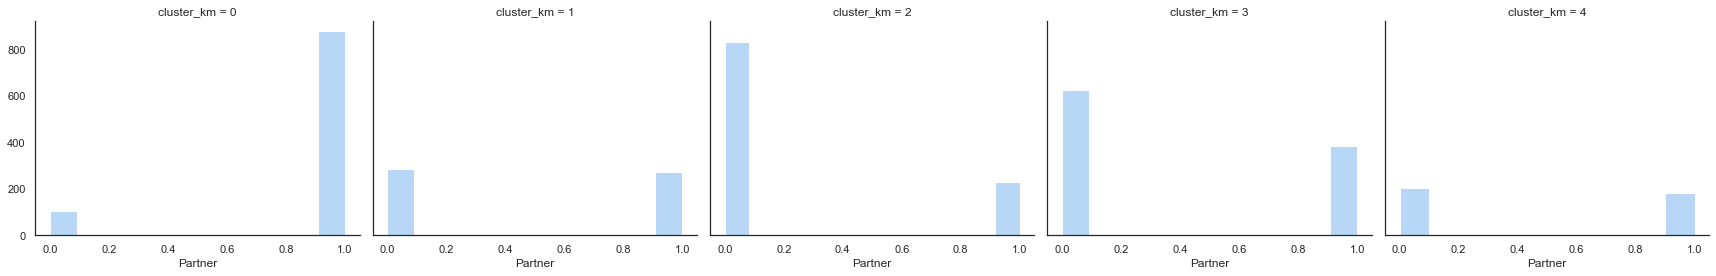

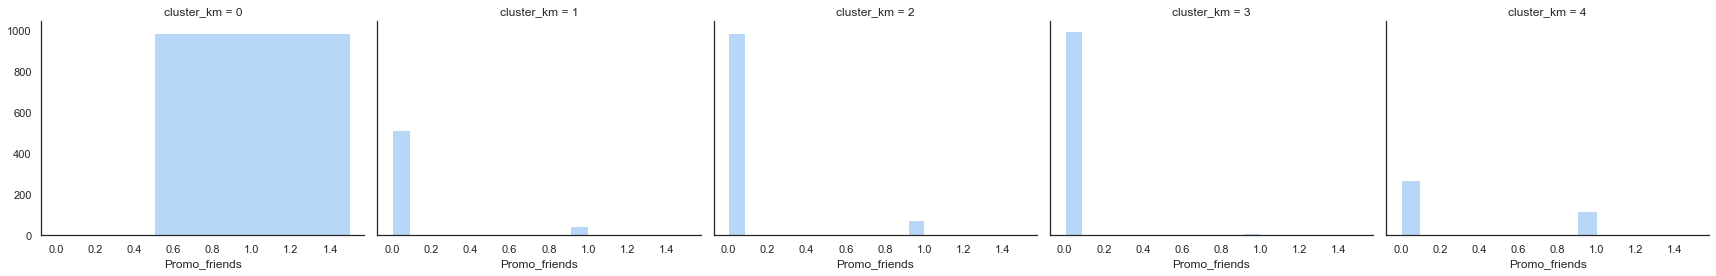

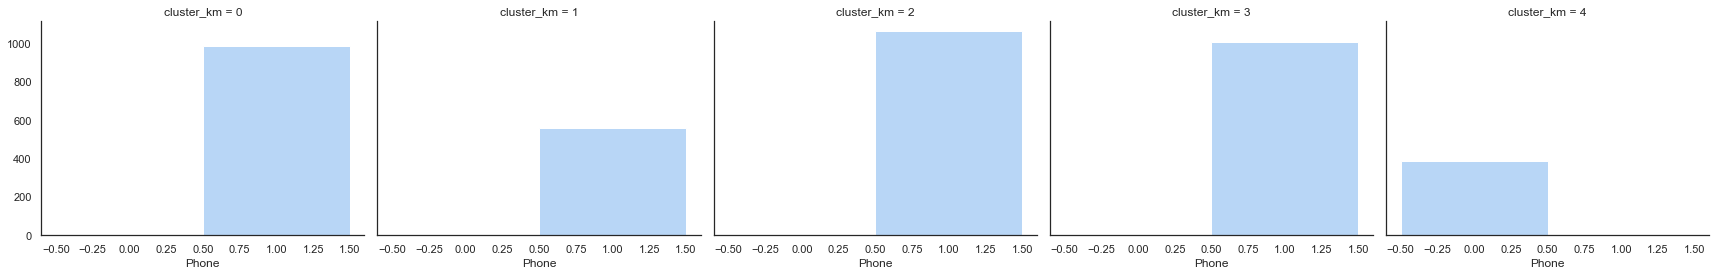

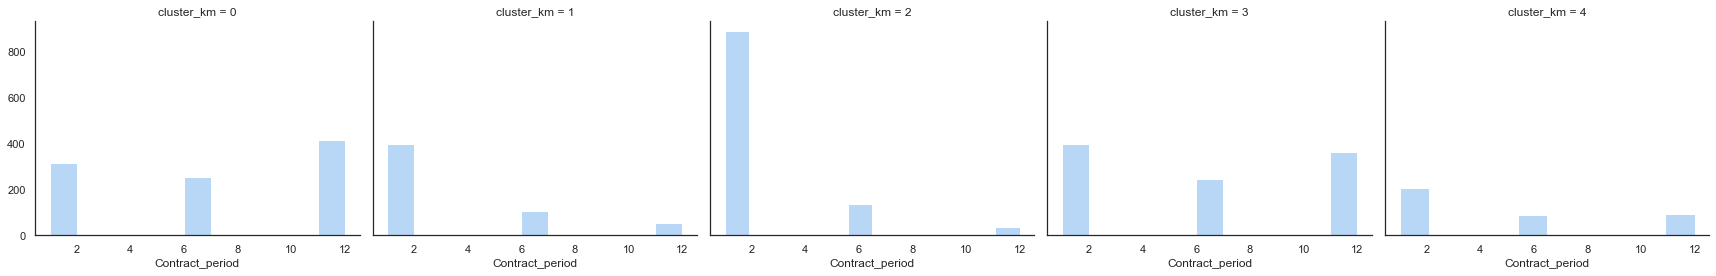

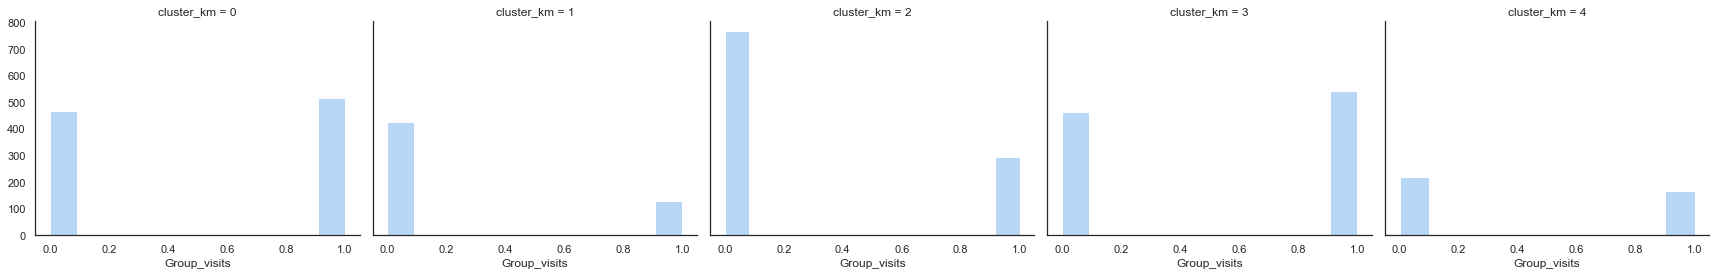

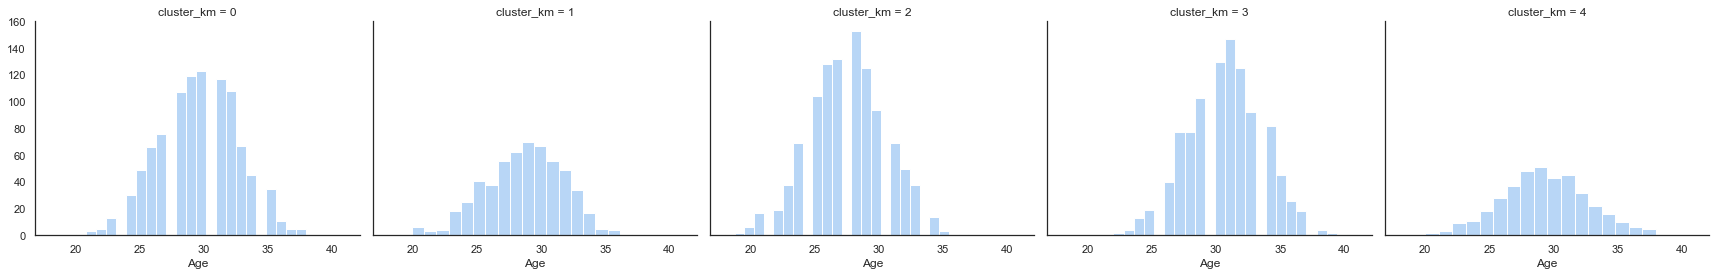

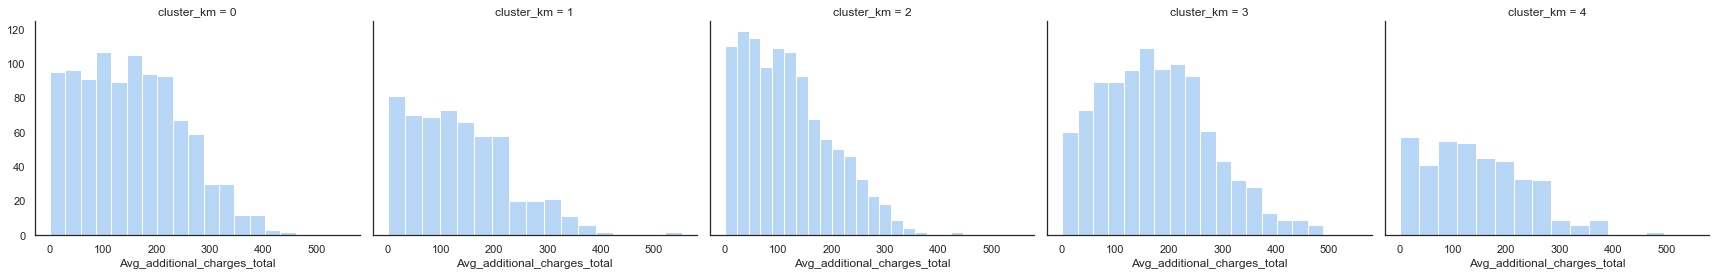

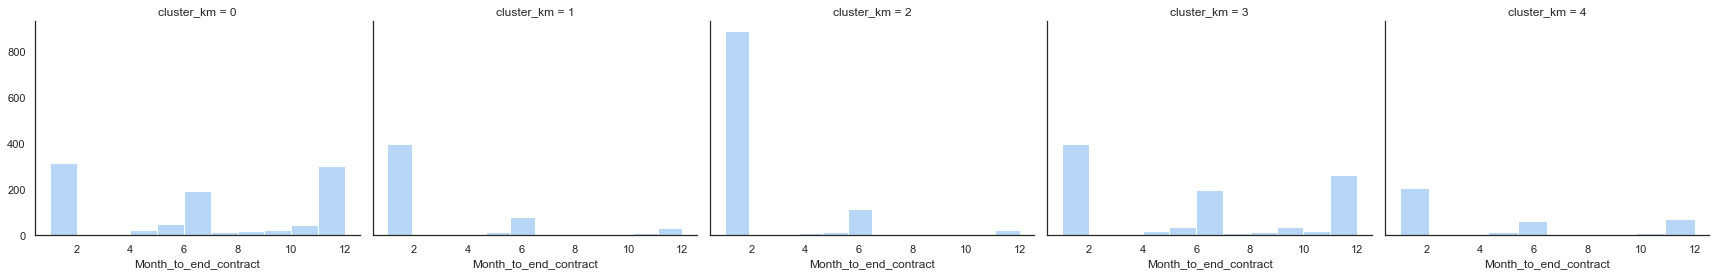

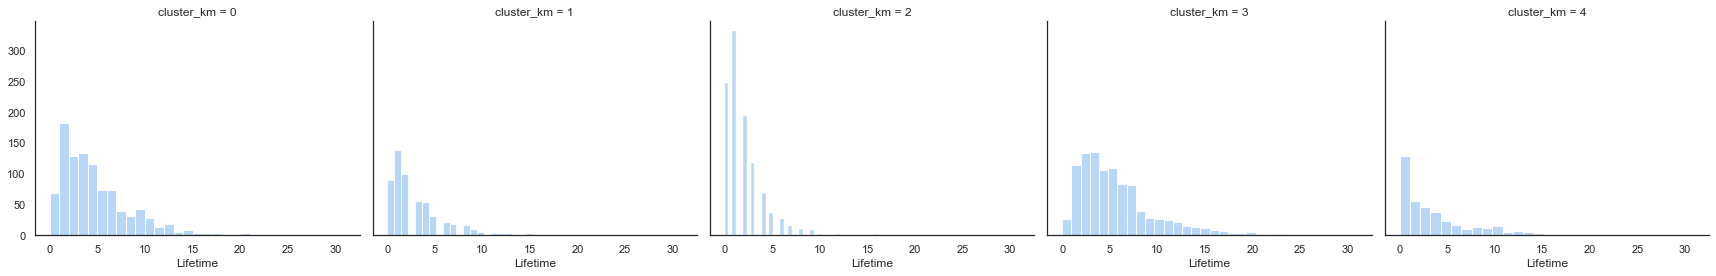

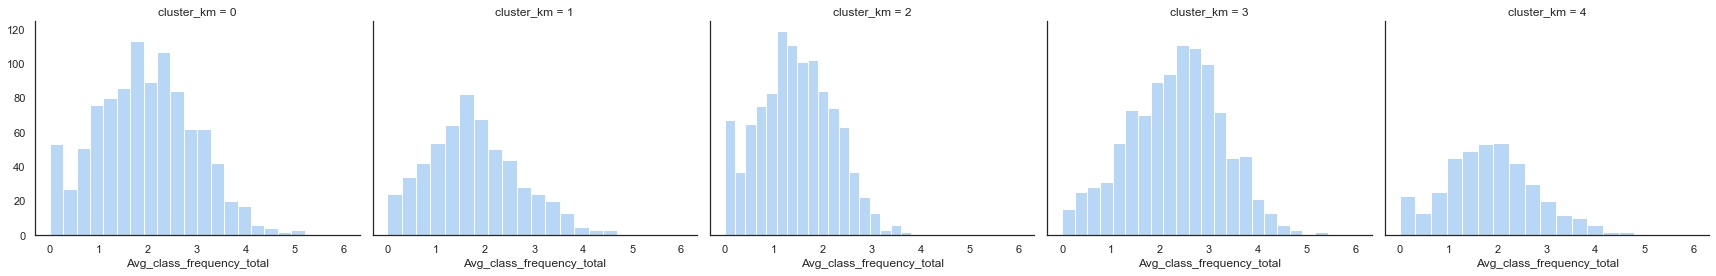

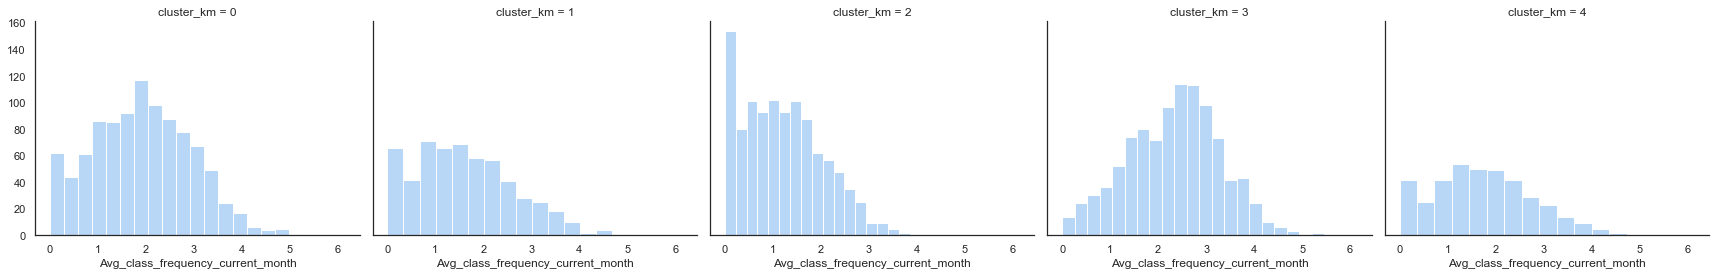

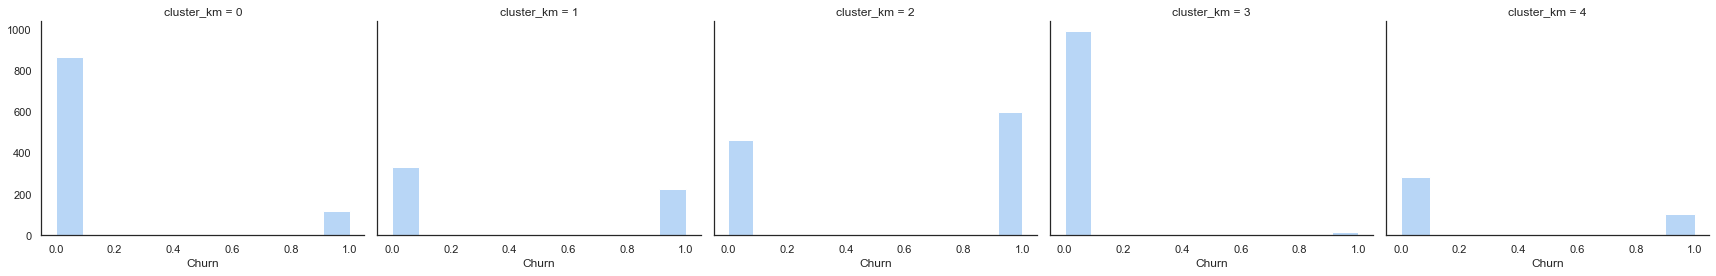

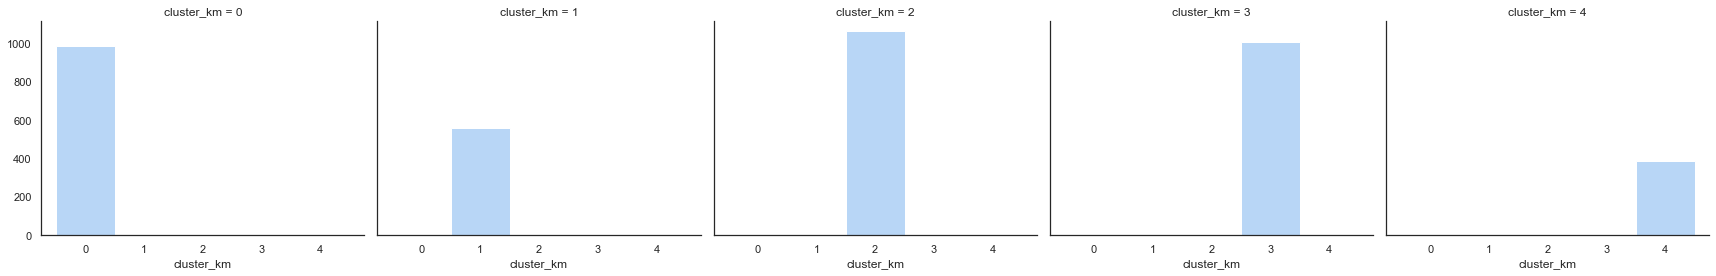

In [25]:
for col in gym:
    sns.set_theme(style="white", palette='pastel')
    g = sns.FacetGrid(gym, col="cluster_km", height=4, aspect=1.2)
    g.map(sns.histplot, col)
    plt.show()


**Выводы по распределениям признаков по кластерам**
- Клиенты кластеров 0 и 3 всегда живут рядом с клубом.
- Кластер 0 выделяется самой большой долей участников партнрских программ. В кластерах 2 и 3 больше доля тех, кто не учствует в партнерских программах
- Более активно в акции "Приведи друга" участвует кластер 0. В кластере 3 очень малая доля тех, кто пришел с друзьями. Преимущественно самостоятельный приход в клуб также отличает кластеры 1 и 2
- Длительные контракты характерны для кластеров 0 и 3, в остальных кластерах, особенно в клатсере 2, преобладают контракты на 1 месяц
- Групповые занятия посещют более половины клиентов кластеров 0 и 3. Клиенты кластеров 1 и 2 предпочитают самостоятельные занятия
- Клиенты кластеров 1 и 2 - до 35 лет, большинству из них - меньше 30 лет. В кластере 3 более половины клиентов старше 30 лет
- Самые большие суммы на доплуслуги тратят клиенты кластеров 0 и 3. В кластере 2 большинство либо не покупают допуслуги, либо тратят начальные суммы
- У большинства клиентов кластеров 1 и 2 контракты заканчиваются через 1 месяц
- Самый большой лайфтайм у клиентов кластера 3 и 0 - до 20 месяцев. Для всех кластеров основной лайфтайм - до 5 месяцев
- Клиенты кластера 3 посещают клуб до 6 раз в неделю, меньше всего бывают к клубе клиенты кластера 2 - до 4 раз в неделю
- В текущем месяце большинство клиентов кластера 2 не посещали занятия
- Самая низкая доля оттока у клиентов кластеров 0 и 3, больше половины клиентов кластеров 1 и 4 также оставются. Больше половины кластера 2 - уходят

In [26]:
# подсчет количества оставшихся в каждом кластере
gym_st = gym.query('Churn == 0').groupby('cluster_km').agg({'Churn':'count'}).reset_index().rename(columns={'Churn':'Yes'})
gym_st

,cluster_km,Yes
0,0,867
1,1,333
2,2,464
3,3,992
4,4,283


In [27]:
# подсчет количества ушедших в каждом кластере
gym_not = gym.query('Churn == 1').groupby('cluster_km').agg({'Churn':'count'}).reset_index().rename(columns={'Churn':'No'})
gym_not

,cluster_km,No
0,0,118
1,1,225
2,2,600
3,3,15
4,4,103


In [28]:
# расчет доли оставшихся 
gym_join = gym_st.merge(gym_not)
gym_join['sum'] = gym_join['Yes'] + gym_join['No']
gym_join['share'] = gym_join['Yes'] / gym_join['sum']
gym_join

,cluster_km,Yes,No,sum,share
0,0,867,118,985,0.880203
1,1,333,225,558,0.596774
2,2,464,600,1064,0.436090
3,3,992,15,1007,0.985104
4,4,283,103,386,0.733161


Доля оставшихся клиентов выше всего в кластерах 3 (98%) и 0 (88%).

Наибольший отток в кластерах 2 (57%) и 1 (41%).

<a id='5'></a>

## Шаг 5. Выводы и базовые рекомендации по работе с клиентами

Клиентов условно можно разделить на несколько групп:
- Низкий риск оттока:
    - "лояльные" - кластер 0 - сотрудники партерских компаний, участники акции "Приведи друга", любят посещать групповые занятия, живут рядом с клубом, предпочитают контракты от 6 месяцев;
    - "профессионалы" - кластер 3 - живут рядом с клубом, часто приходят на тренировки (до 6 раз в неделю), активно пользуются допуслугами, старше 30 лет, приходят в клуб самостотельно
- Средний риск оттока:
    - "любители" - занимаются около 2 раз в неделю, посещают групповые занятия, имеют непродолжительные контракты
- Высокий риск оттока:
    - "начинающие" - кластер 2 - чаще живут далеко от клуба, приходят самостоятельно, имеют короткий контракт и находятся к начале его срока действия, не посещают групповые занятия, занимаются до 2 раз в неделю, в последний месяц перестают посещать занятия.
    
Возможная маркетинговая стратегия может заключаться в "переводе" из одной группы в другую. Например:
1. Помочь "начинающим" стать "любителями"  - у них много общего. Привлекать приходить в клуб - чем чаще клиент ходит, тем меньше вероятность оттока - на групповые занятия, соревнования или специальные занятия для новичков, которые только купили абонемент. Разарботать систему поощрений для тех, кто отходит определенное количество раз в клуб на протяжении действия месячного абонемента (следующий абонемент со скидкой или конкурс на самого активного новичка)
2. Помочь "любителям" стать "профессионалам" - привелечь на продолжение контракта, работать для увеличения количества тренировок в неделю и увеличить спрос на допуслуги (тематические дни тренировок, акции на допуслуги и на увеличие контракта до его окончания)

Еще одни действенным вариантом может быть увеличиения количества клиентов "лояльной" группы - тех, кто приходит в клуб по рекомендации, т.е. возможно, ходит на занятия вместе с друзьями, вместе посещают групповые занятия. Для этого необходимо расширять партнерскую сеть - вести переговоры с компаниями, проводить совместные мероприятия с сотрудниками компаний (например, спортивный тимбилдинг с тренерами клуба), разрабоать акции для тех, кто ходит с друзьями или приводит в клуб новых клиентов (парные тренировки, скидки на последующий абонемент в зависимости от количества приведеннных друзей). Также будет полезно рабоать с жителями ближайших домов, чтобы повысить узнаваемость клуба.